In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from collections import Counter
import seaborn as sb

**KAGGLE**

https://www.kaggle.com/

![](https://www.kdnuggets.com/wp-content/uploads/kaggle.jpg)

In [15]:
# https://www.kaggle.com/raoulma/cancer-image-tensorflow-cnn-80-valid-acc/data
# This dataset consists of 5547 breast histology images of size 50 x 50 x 3,
# curated from Andrew Janowczyk website and used for a data science tutorial at Epidemium. T
# The goal is to classify cancerous images (IDC : invasive ductal carcinoma) vs non-IDC images.

In [17]:
X = np.load('./X.npy')

In [18]:
Y = np.load('./Y.npy')

In [164]:
shape = X.shape

In [165]:
shape

(5547, 50, 50, 3)

In [28]:
Counter(Y)

Counter({0: 2759, 1: 2788})

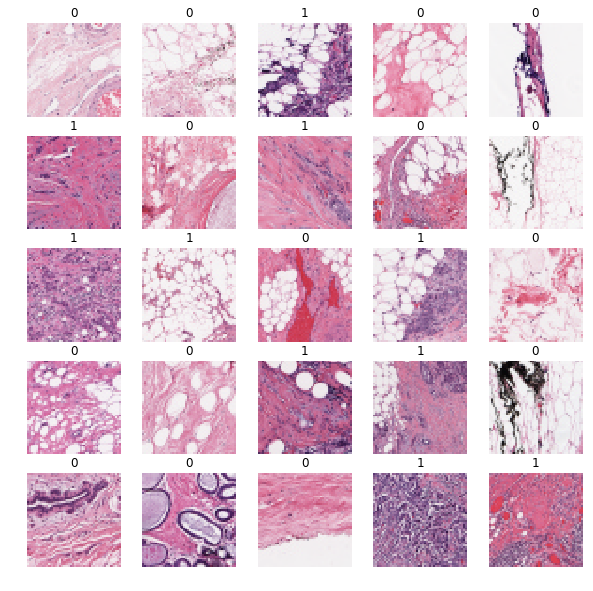

In [163]:
fig,axes = plt.subplots(5,5,figsize=(10,10))
for ax in np.ravel(axes):
    n = np.random.randint(5000)
    ax.imshow(X[n,:,:,:])
    ax.axis('off')
    ax.set_title(Y[n])
plt.show()

In [36]:
X_reshaped = np.reshape(X,(5547,shape[1]*shape[2]*shape[3]))

In [37]:
X_reshaped.shape

(5547, 7500)

---

In [74]:
# np.reshape의 작동 방식 
test = np.random.rand(2,3,4)

In [77]:
test

array([[[0.8997199 , 0.97058572, 0.85690395, 0.55253984],
        [0.29517731, 0.0766516 , 0.97827144, 0.07765963],
        [0.41121043, 0.1911559 , 0.76209353, 0.22926325]],

       [[0.37570987, 0.83313557, 0.70368961, 0.40954735],
        [0.02799272, 0.50179093, 0.43032383, 0.22288561],
        [0.6145421 , 0.26078114, 0.9673889 , 0.81329055]]])

In [76]:
np.reshape(test,(2,12))

array([[0.8997199 , 0.97058572, 0.85690395, 0.55253984, 0.29517731,
        0.0766516 , 0.97827144, 0.07765963, 0.41121043, 0.1911559 ,
        0.76209353, 0.22926325],
       [0.37570987, 0.83313557, 0.70368961, 0.40954735, 0.02799272,
        0.50179093, 0.43032383, 0.22288561, 0.6145421 , 0.26078114,
        0.9673889 , 0.81329055]])

---

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scaler = StandardScaler()

In [186]:
X_reshaped_scale = scaler.fit_transform(X_reshaped)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [187]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [188]:
pca = PCA(n_components=2)

In [189]:
X_reshaped_scale_pca = pca.fit_transform(X_reshaped_scale)

In [190]:
df_pca = pd.DataFrame(data=X_reshaped_scale_pca,columns=['PC1','PC2'])
df_pca['class'] = Y

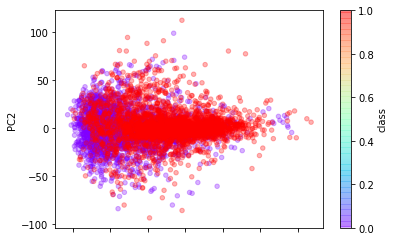

In [191]:
df_pca.plot(kind='scatter',x='PC1',y='PC2',c='class',cmap='rainbow',alpha=0.3)

In [192]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped_scale_pca,Y)

l  = 0.001
gb = GradientBoostingClassifier(n_estimators=5000,learning_rate=l)
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [194]:
gb.score(X_test,y_test)

0.7245854361932228

In [218]:
pca = PCA(n_components=25)
X_reshaped_scale_pca_25 = pca.fit_transform(X_reshaped_scale)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped_scale_pca_25,Y)

l  = 0.001
gb = GradientBoostingClassifier(n_estimators=5000,learning_rate=l)
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [220]:
gb.score(X_test,y_test)

0.7815428983417447

In [221]:
X.shape

(5547, 50, 50, 3)

In [222]:
n = 1
xinput_pre = X[1,:,:,:]
xinput = np.reshape(xinput_pre,(-1,7500))
xinput = scaler.transform(xinput)
xinput = pca.transform(xinput)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'picture 1, answer:0, predicted:0')

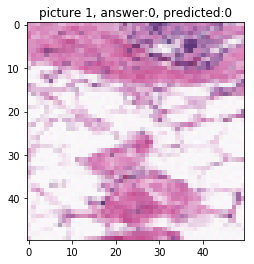

In [223]:
plt.imshow(xinput_pre)
plt.title("picture %d, answer:%d, predicted:%d"%(n,Y[n],gb.predict(xinput)))

In [224]:
# clustering

In [225]:
df_pca_25 = pd.DataFrame(data=X_reshaped_scale_pca_25,index=Y)

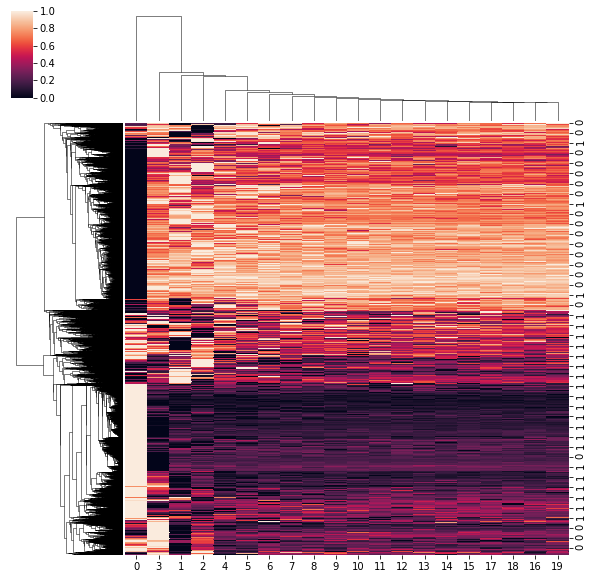

In [261]:
sb.clustermap(df_pca_20,standard_scale=0)

---

In [296]:
# MRI and alzheimer
# https://www.kaggle.com/jboysen/mri-and-alzheimers
# Can you predict dementia? Alzheimer’s?
from sklearn.preprocessing import scale

In [235]:
df_mri = pd.read_csv('./oasis_cross-sectional.csv')

In [244]:
Y = pd.Categorical(df_mri['M/F']).codes

In [277]:
df_mri['Y'] = Y

In [278]:
col = ['CDR','eTIV','nWBV','ASF','Y']

In [288]:
X = df_mri[col].dropna().values
Y = df_mri[col].dropna()['Y']

In [281]:
X_scale = scale(X)

In [289]:
df_mri_reset = pd.DataFrame(data=X_scale, columns=col,index=Y)

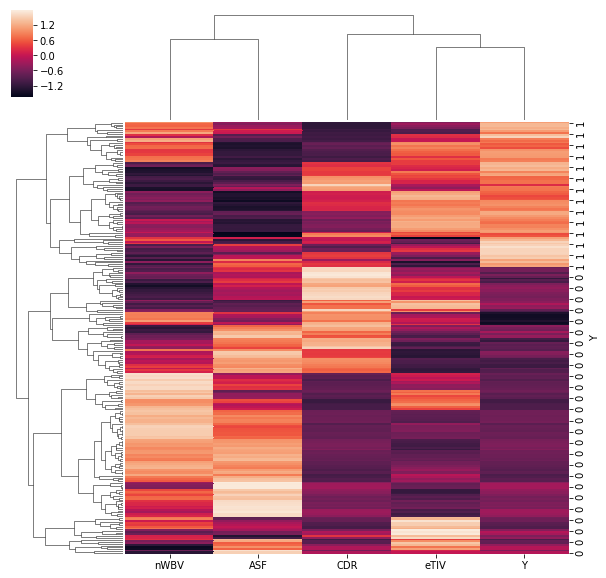

In [290]:
sb.clustermap(df_mri_reset.dropna(),z_score=0)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
rb = RandomForestClassifier(n_estimators=2000)

In [294]:
rb.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [295]:
rb.score(X_test,y_test)

1.0